In [2]:
import pandas as pd
from ast import literal_eval
import numpy as np
import matplotlib.pyplot as plt

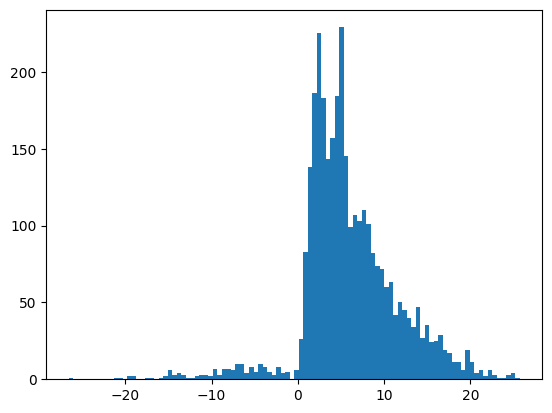

In [3]:
df = pd.read_csv("../data/pre_metal_t15_T25_I0.1_E3_m10_clean.csv")
flat_list = df["pKa_value"].apply(literal_eval).explode().tolist()
plt.hist(flat_list, bins=100)
plt.show()

In [7]:
minusflat_list = [x for x in flat_list if x < 0]
len(minusflat_list), len(flat_list)


(156, 3249)

# 修改顏色

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/work/u5066474/NTHU/LiveTransForM-main/MetalGCN/output/metal_ver14/metal_ver14_evaluation_results.csv")


In [20]:
import os
os.chdir("/work/u5066474/NTHU/LiveTransForM-main/MetalGCN/src")

[PLOT]分布圖： ../output/metal_ver14/pka_combined_metal_ver14.png saved


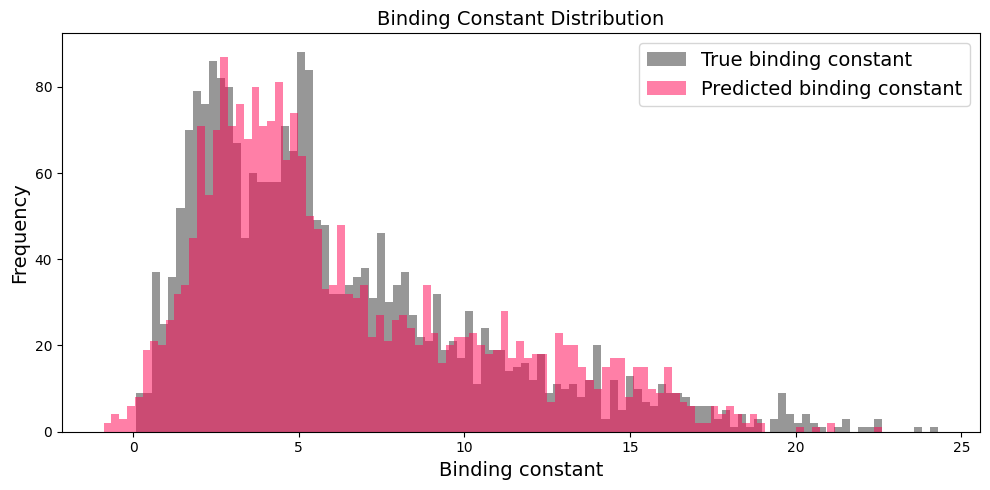

In [21]:
VERSION = "metal_ver14"
font_size = 14
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.hist(df['y_true'], bins=100, alpha=0.5, label="True binding constant", color="#303030")
ax.hist(df['y_pred'], bins=100, alpha=0.5, label="Predicted binding constant", color="#ff0050")
ax.set_xlabel("Binding constant", fontsize=font_size)
ax.set_ylabel("Frequency", fontsize=font_size)
ax.set_title("Binding Constant Distribution", fontsize=font_size)
ax.legend(fontsize=font_size)
fig.tight_layout()
fig.savefig(f"../output/{VERSION}/pka_combined_{VERSION}.png")
print(f"[PLOT]分布圖： ../output/{VERSION}/pka_combined_{VERSION}.png saved")


In [17]:
from ast import literal_eval
def draw_pka_distribution(VERSION):
    df = pd.read_csv(f"../results/{VERSION}/pka_combined_{VERSION}.csv")
    x = df["true_pka"].apply(literal_eval)
    x_list = [item for sublist in x for item in sublist]
    y = df["pred_pka"].apply(literal_eval)
    y_list = [item for sublist in y for item in sublist]
    fig = plt.figure(figsize=(10, 5), dpi=300)
    ax = fig.add_subplot(1, 1, 1)
    ax.hist(x_list, bins=100, alpha=0.5, label="True pKa", color="#303030")
    ax.hist(y_list, bins=100, alpha=0.5, label="Predicted pKa", color="#ff0050")
    font_size = 14
    ax.set_xlabel("pKa", fontsize=font_size)
    ax.set_ylabel("Frequency", fontsize=font_size)
    ax.set_title("pKa Distribution", fontsize=font_size)
    ax.legend(fontsize=font_size)
    plt.tight_layout()
    plt.savefig(f"../results/{VERSION}/pka_combined_{VERSION}.png")
    print(f"[PLOT]分布圖： ../results/{VERSION}/pka_combined_{VERSION}.png saved")


In [ ]:
import os
os.chdir("/work/u5066474/NTHU/LiveTransForM-main/OMGNN/src")

[PLOT]分布圖： ../results/pka_ver26/pka_combined_pka_ver26.png saved


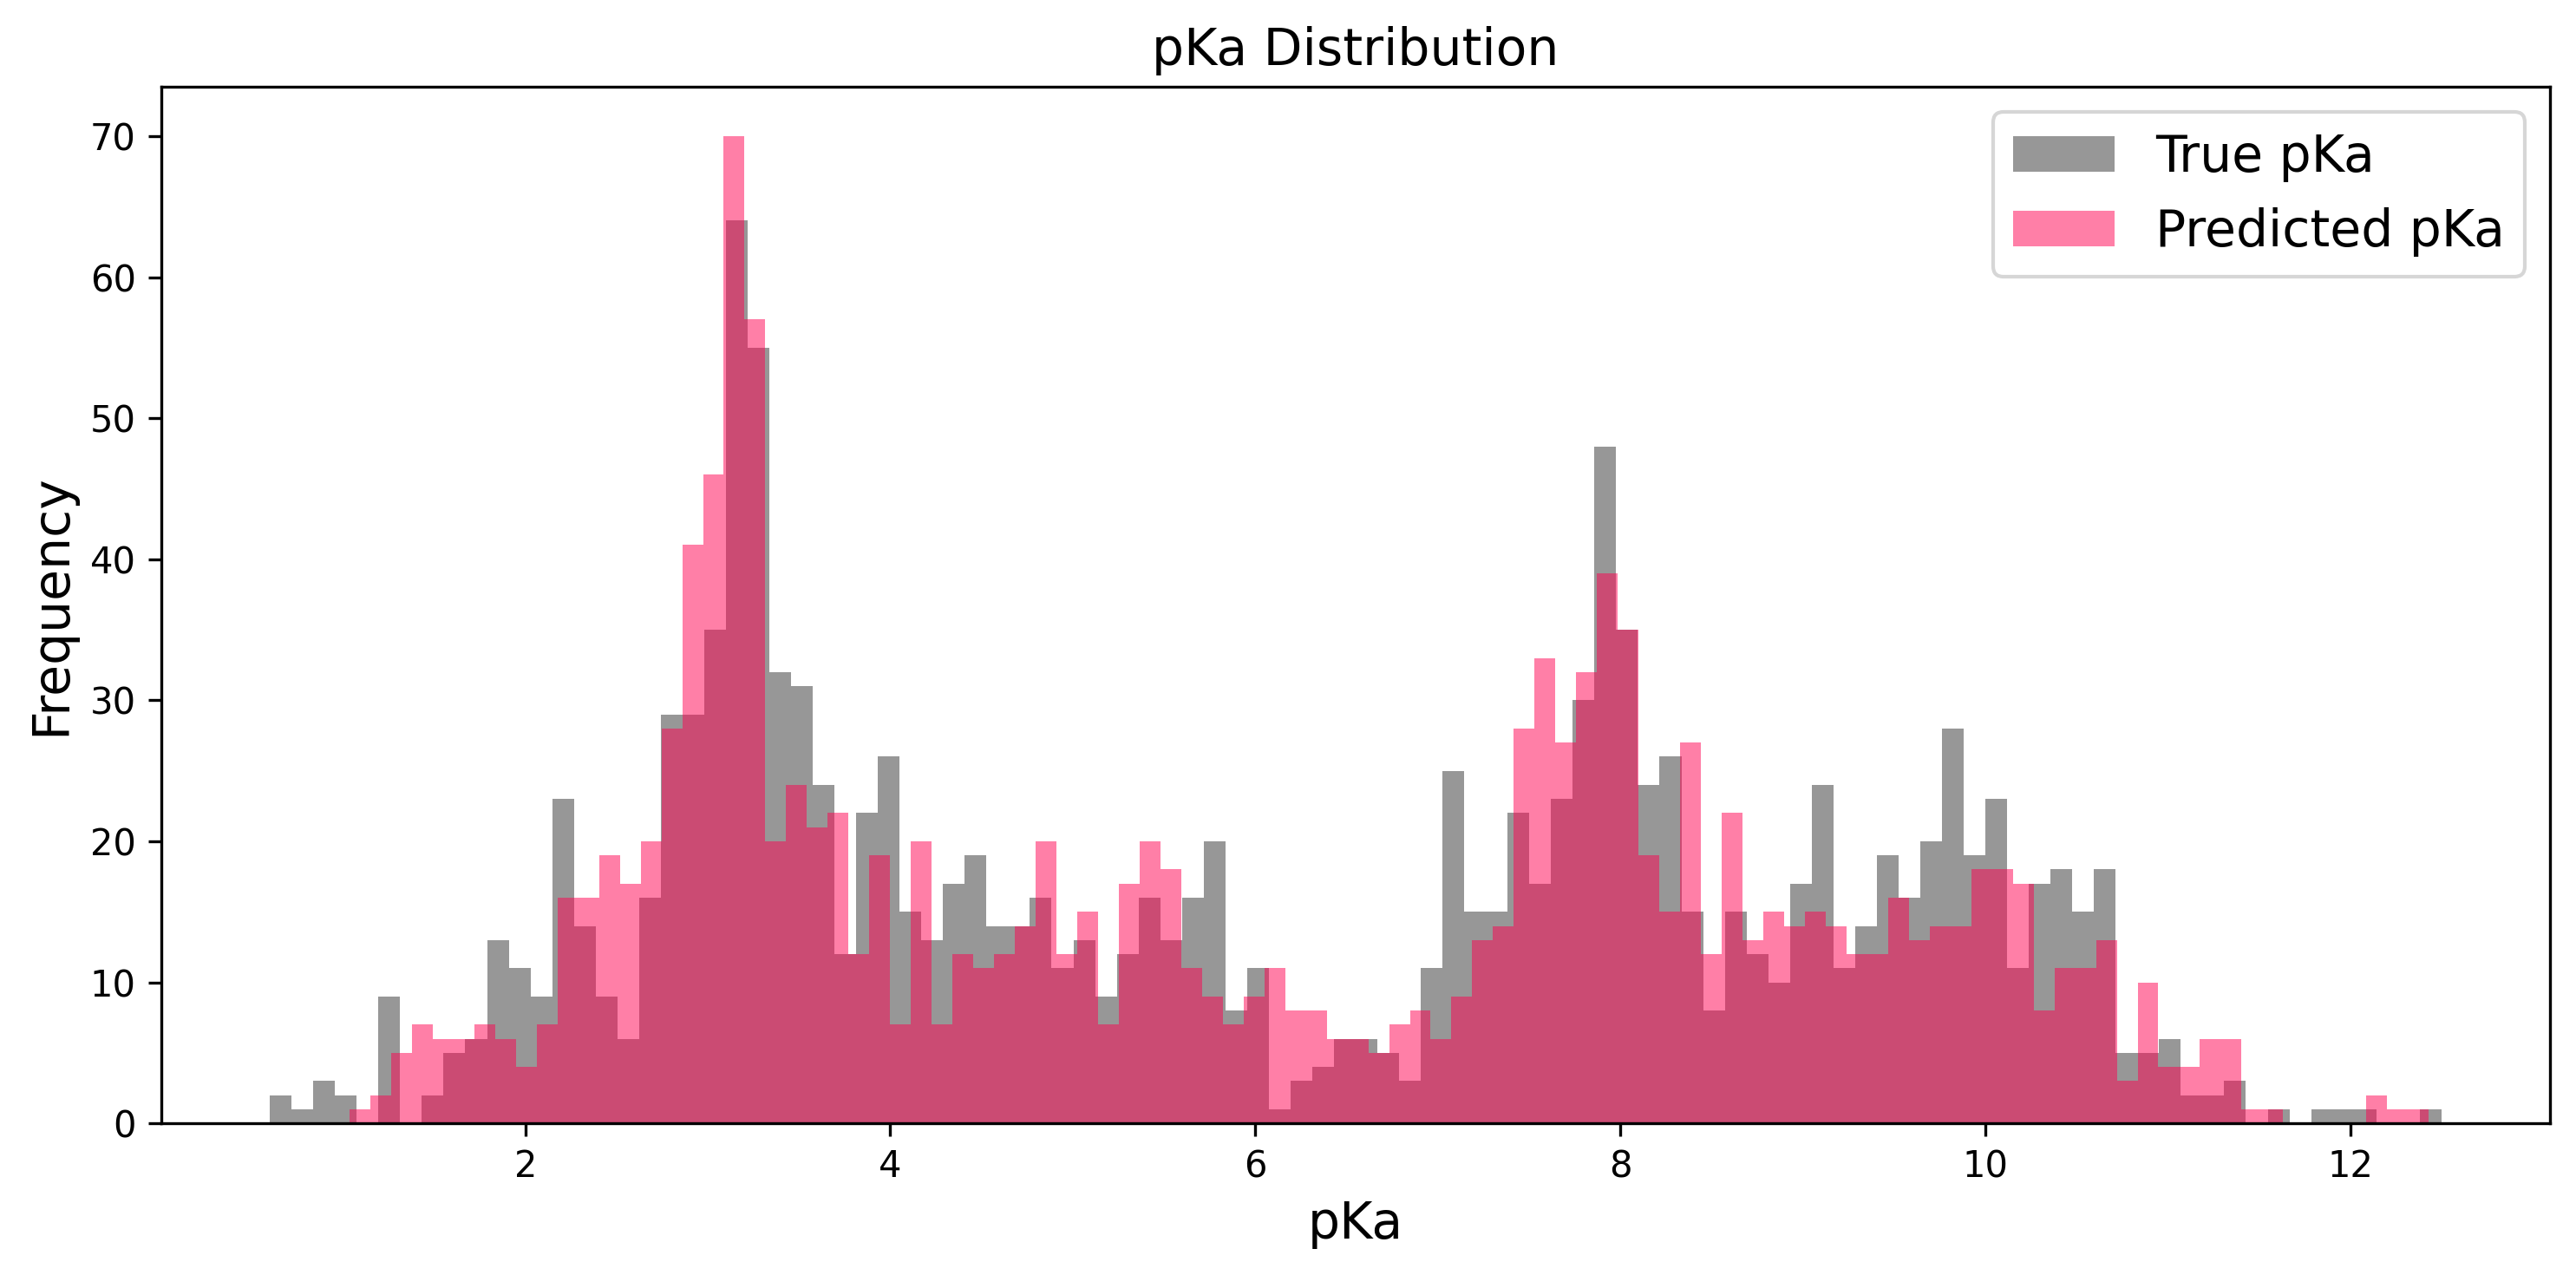

In [18]:
VERSION = "pka_ver26"
draw_pka_distribution(VERSION)

## 各金屬數量

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df_metal = pd.read_csv("/work/u5066474/NTHU/LiveTransForM-main/MetalGCN/output/metal_ver14/metal_ver14_evaluation_results.csv")

<Axes: xlabel='metal_ion'>

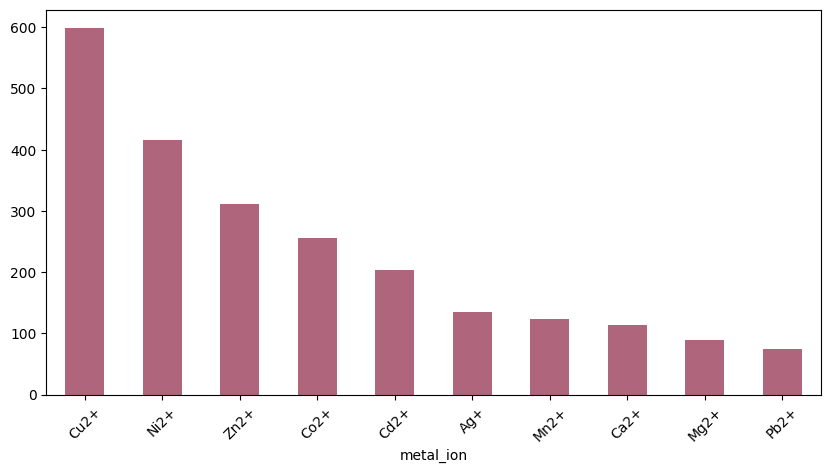

In [7]:
df_metal['metal_ion'].value_counts().plot(kind='bar', figsize=(10, 5), color="#af657c", rot=45)

In [9]:
df_pKa = pd.read_csv("/work/u5066474/NTHU/LiveTransForM-main/OMGNN/output/pka_mapping_results.csv")

In [12]:
df_pKa['smiles'].shape[0]

771

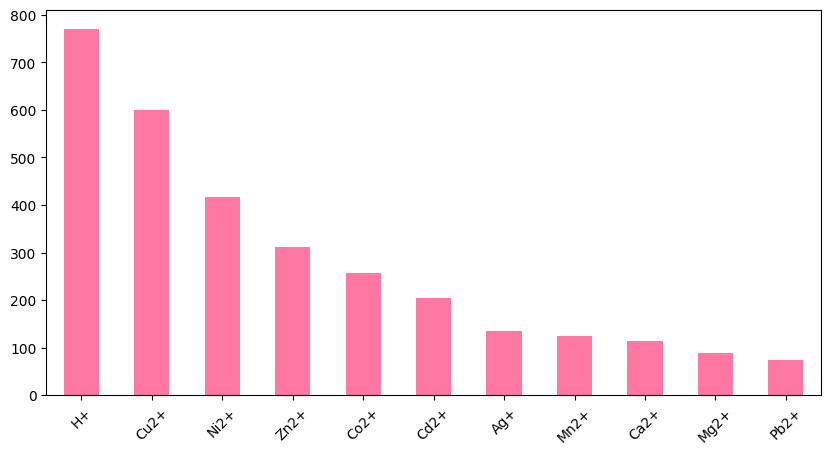

In [17]:

# 先計算各金屬的數量
metal_counts = df_metal['metal_ion'].value_counts()

# 加上 H+ 的數量
metal_counts['H+'] = 771
metal_counts = pd.Series({'H+': metal_counts['H+'], **metal_counts.drop('H+').to_dict()})

# 繪圖
metal_counts.plot(kind='bar', figsize=(10, 5), color="#ff77a2", rot=45)
plt.show()

# 分別畫金屬的parity plot

In [ ]:
from parity_plot import parity_plot

df_metal = pd.read_csv("/work/u5066474/NTHU/LiveTransForM-main/MetalGCN/output/metal_ver14/metal_ver14_evaluation_results.csv")

In [ ]:
# 創建分別的金屬parity plot函數
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def _reg_metrics(y_t: np.ndarray, y_p: np.ndarray):
    """RMSE / MAE / R²"""
    if len(y_t) == 0:
        return np.nan, np.nan, np.nan
    rmse = float(np.sqrt(mean_squared_error(y_t, y_p)))
    mae  = float(mean_absolute_error(y_t, y_p))
    r2   = float(r2_score(y_t, y_p))
    return rmse, mae, r2

def create_metal_parity_plots(df, save_dir="../output/metal_ver14"):
    """創建分別的train/test金屬parity plot"""
    import os
    os.makedirs(save_dir, exist_ok=True)
    
    # 獲取所有金屬類型
    metal_types = sorted(df['metal_ion'].unique())
    
    # 設置顏色映射
    colors = plt.cm.Set3(np.linspace(0, 1, len(metal_types)))
    metal_color_map = dict(zip(metal_types, colors))
    
    # 為train和test分別創建圖
    for data_type in ['train', 'test']:
        is_train = data_type == 'train'
        data_subset = df[df['is_train'] == is_train]
        
        if len(data_subset) == 0:
            print(f"No {data_type} data found")
            continue
            
        fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
        
        # 計算全體範圍
        all_true = data_subset['y_true'].values
        all_pred = data_subset['y_pred'].values
        mn = min(all_true.min(), all_pred.min()) - 0.5
        mx = max(all_true.max(), all_pred.max()) + 0.5
        
        # y = x 基準線
        ax.plot([mn, mx], [mn, mx], "k--", lw=1, alpha=0.7)
        
        # 為每種金屬繪製散點圖
        legend_handles = []
        metal_metrics = []
        
        for i, metal in enumerate(metal_types):
            metal_data = data_subset[data_subset['metal_ion'] == metal]
            if len(metal_data) == 0:
                continue
                
            y_true_metal = metal_data['y_true'].values
            y_pred_metal = metal_data['y_pred'].values
            
            # 計算該金屬的指標
            rmse, mae, r2 = _reg_metrics(y_true_metal, y_pred_metal)
            metal_metrics.append((metal, len(y_true_metal), rmse, mae, r2))
            
            # 繪製散點
            scatter = ax.scatter(
                y_true_metal, y_pred_metal,
                c=[metal_color_map[metal]], s=40, alpha=0.7,
                edgecolors="k", linewidth=0.5,
                label=f"{metal} (n={len(y_true_metal)})"
            )
            legend_handles.append(scatter)
        
        # 計算整體指標
        overall_rmse, overall_mae, overall_r2 = _reg_metrics(all_true, all_pred)
        
        # 設置坐標軸
        ax.set_xlim(mn, mx)
        ax.set_ylim(mn, mx)
        ax.set_aspect("equal", adjustable="box")
        ax.xaxis.set_major_locator(MultipleLocator(2))
        ax.yaxis.set_major_locator(MultipleLocator(2))
        ax.grid(ls="--", alpha=0.3)
        
        ax.set_xlabel("Experimental binding constant (LogK)", fontsize=12)
        ax.set_ylabel("Predicted binding constant (LogK)", fontsize=12)
        ax.set_title(f"Metal pKa Prediction - {data_type.capitalize()} Set", fontsize=14)
        
        # 添加整體指標文字框
        bbox_cfg = dict(boxstyle="round", facecolor="white", alpha=0.8)
        txt_overall = f"Overall\\nRMSE = {overall_rmse:.2f}\\nMAE = {overall_mae:.2f}\\nR² = {r2:.2f}"
        ax.text(0.04, 0.96, txt_overall, transform=ax.transAxes,
                va="top", ha="left", bbox=bbox_cfg, fontsize=10)
        
        # 添加圖例
        ax.legend(handles=legend_handles, loc="lower right", fontsize=9)
        plt.tight_layout()
        
        # 保存圖片
        save_path = f"{save_dir}/metal_parity_{data_type}_by_metal.png"
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.close(fig)
        print(f"[PLOT] {save_path} saved")
        
        # 打印各金屬指標
        print(f"\\n{data_type.capitalize()} Set Metrics by Metal:")
        print("-" * 60)
        for metal, n, rmse, mae, r2 in metal_metrics:
            print(f"{metal:>6s}: n={n:3d}, RMSE={rmse:.3f}, MAE={mae:.3f}, R²={r2:.3f}")
        print("-" * 60)
        print(f"Overall: n={len(all_true):3d}, RMSE={overall_rmse:.3f}, MAE={overall_mae:.3f}, R²={overall_r2:.3f}")

# 執行繪圖
create_metal_parity_plots(df_metal)

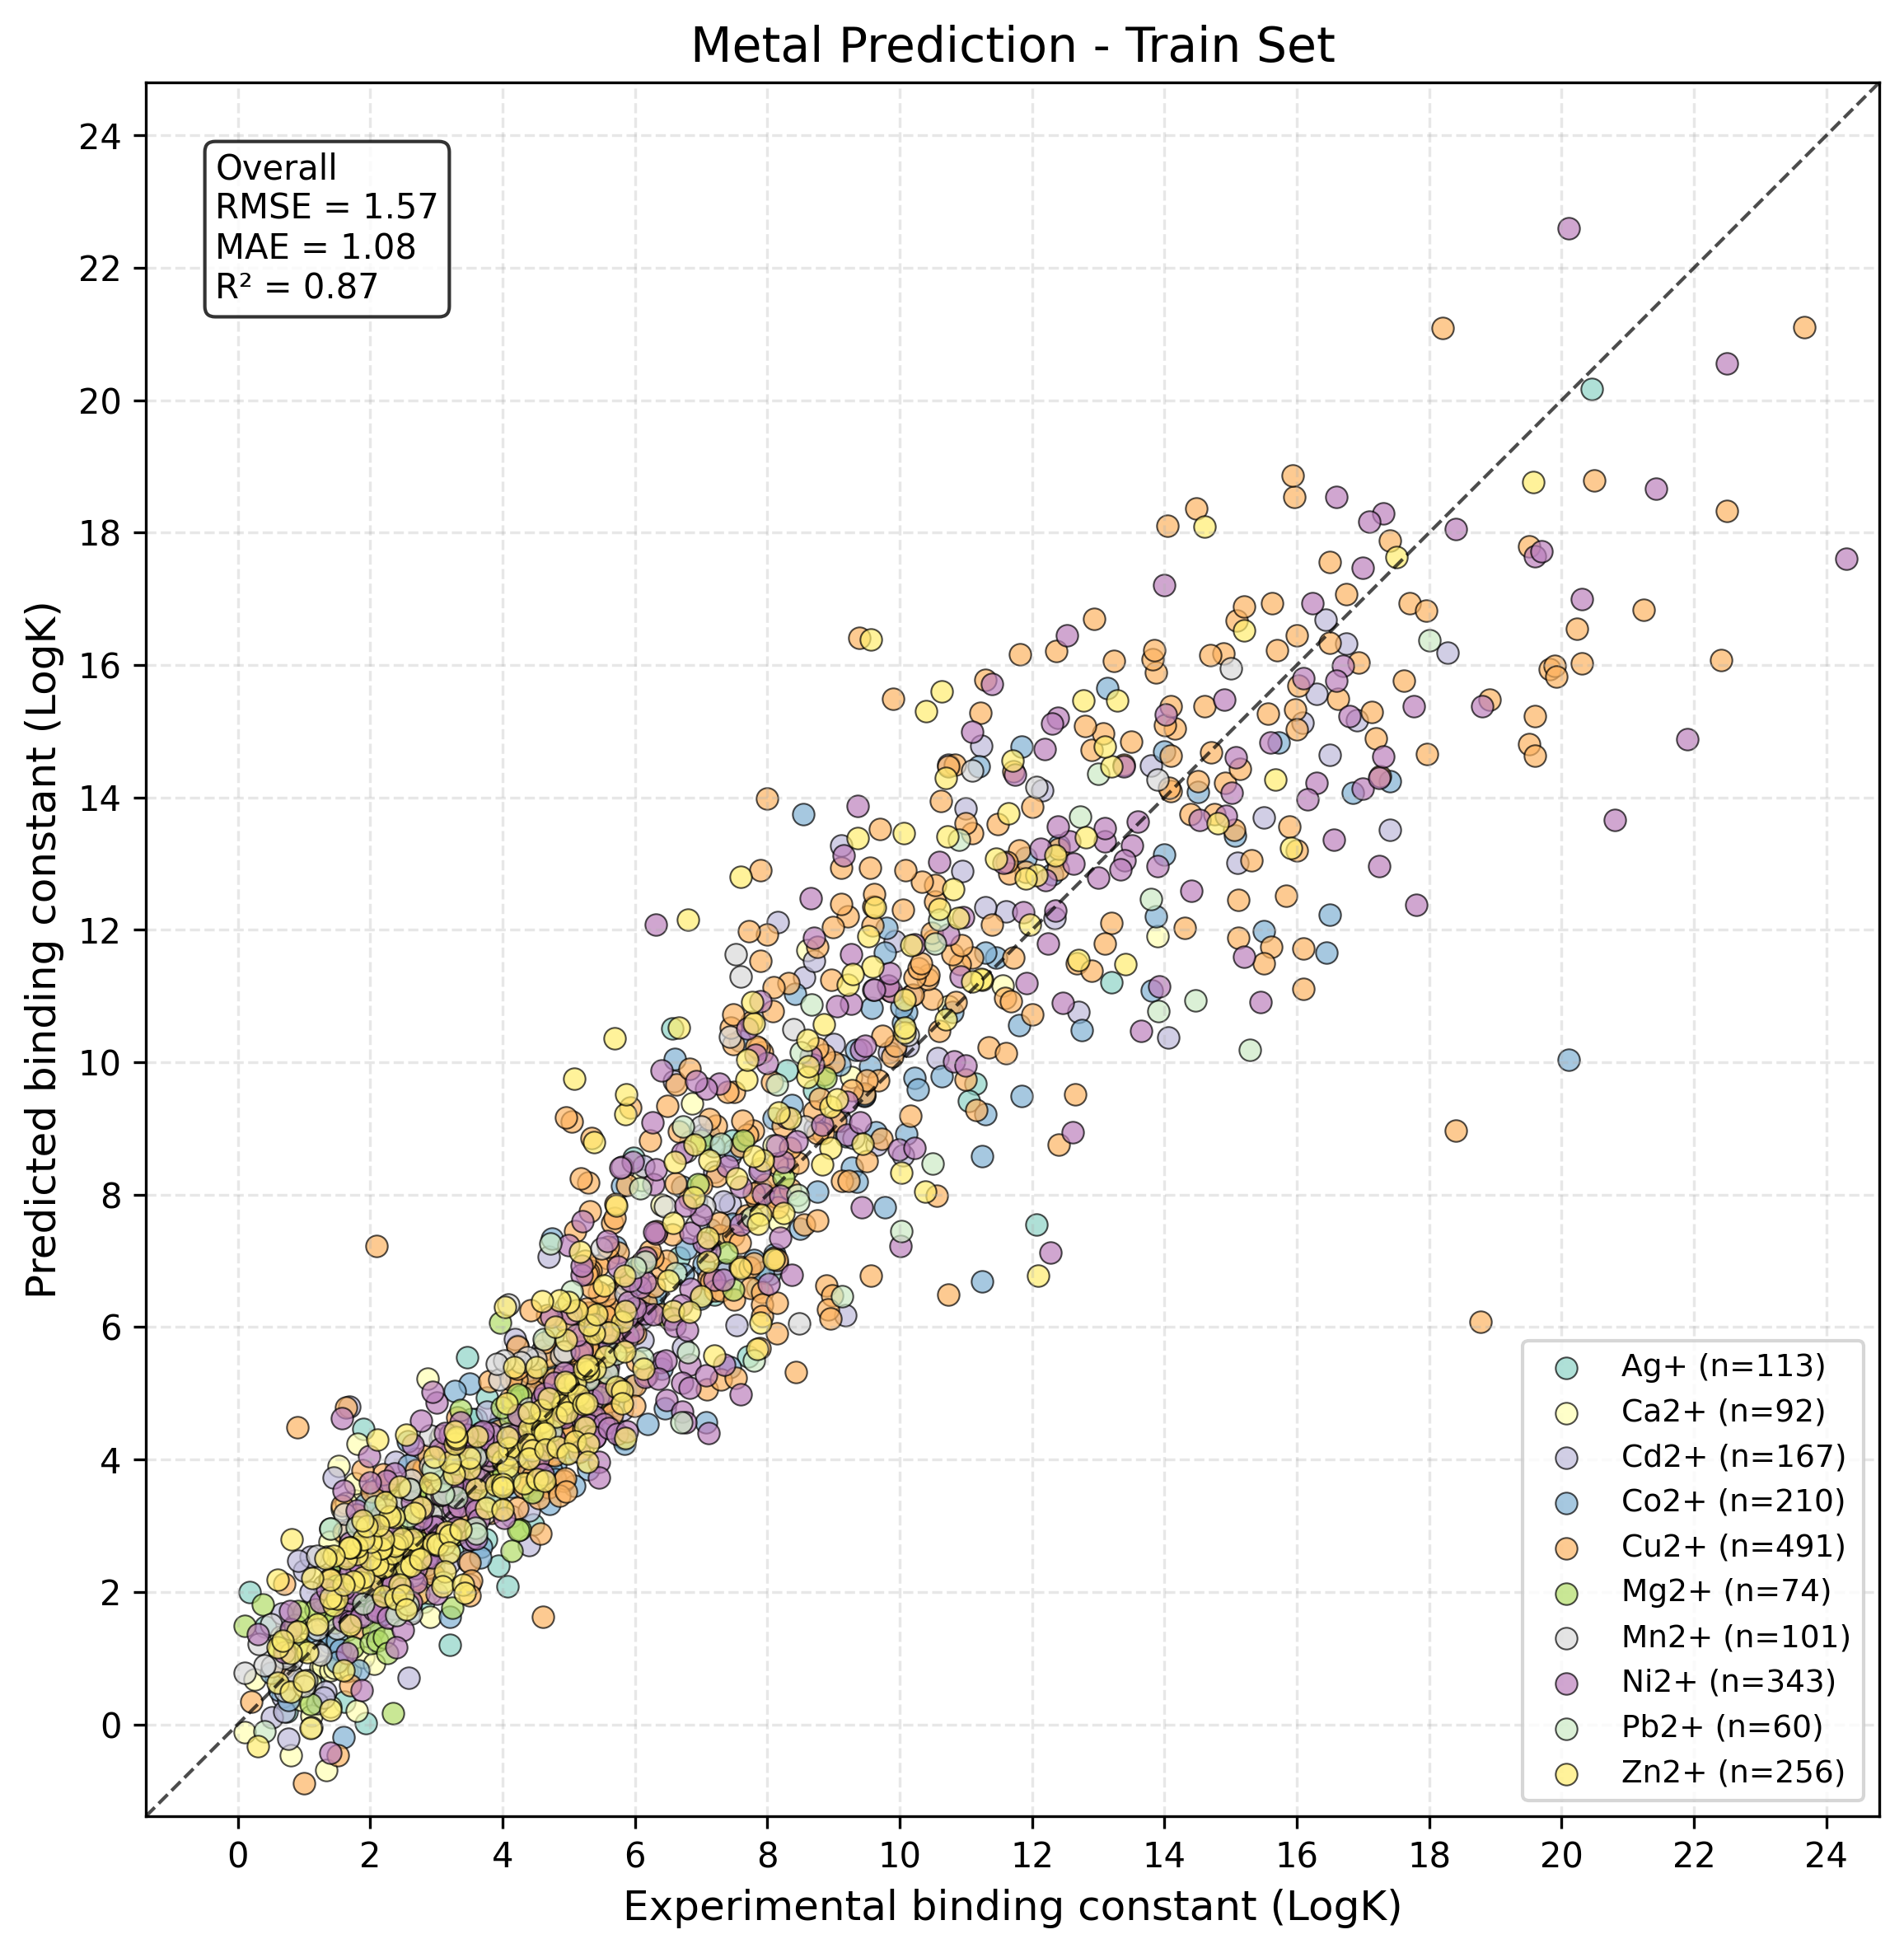

[PLOT] ../output/metal_ver14/metal_parity_train_by_metal.png saved

Train Set Metrics by Metal:
------------------------------------------------------------
   Ag+: n=113, RMSE=1.086, MAE=0.784, R²=0.857
  Ca2+: n= 92, RMSE=1.000, MAE=0.744, R²=0.849
  Cd2+: n=167, RMSE=1.269, MAE=0.899, R²=0.908
  Co2+: n=210, RMSE=1.483, MAE=0.982, R²=0.852
  Cu2+: n=491, RMSE=1.961, MAE=1.379, R²=0.825
  Mg2+: n= 74, RMSE=0.860, MAE=0.710, R²=0.810
  Mn2+: n=101, RMSE=1.147, MAE=0.817, R²=0.842
  Ni2+: n=343, RMSE=1.643, MAE=1.138, R²=0.889
  Pb2+: n= 60, RMSE=1.534, MAE=1.183, R²=0.849
  Zn2+: n=256, RMSE=1.528, MAE=1.040, R²=0.826
------------------------------------------------------------
Overall: n=1907, RMSE=1.570, MAE=1.077, R²=0.873


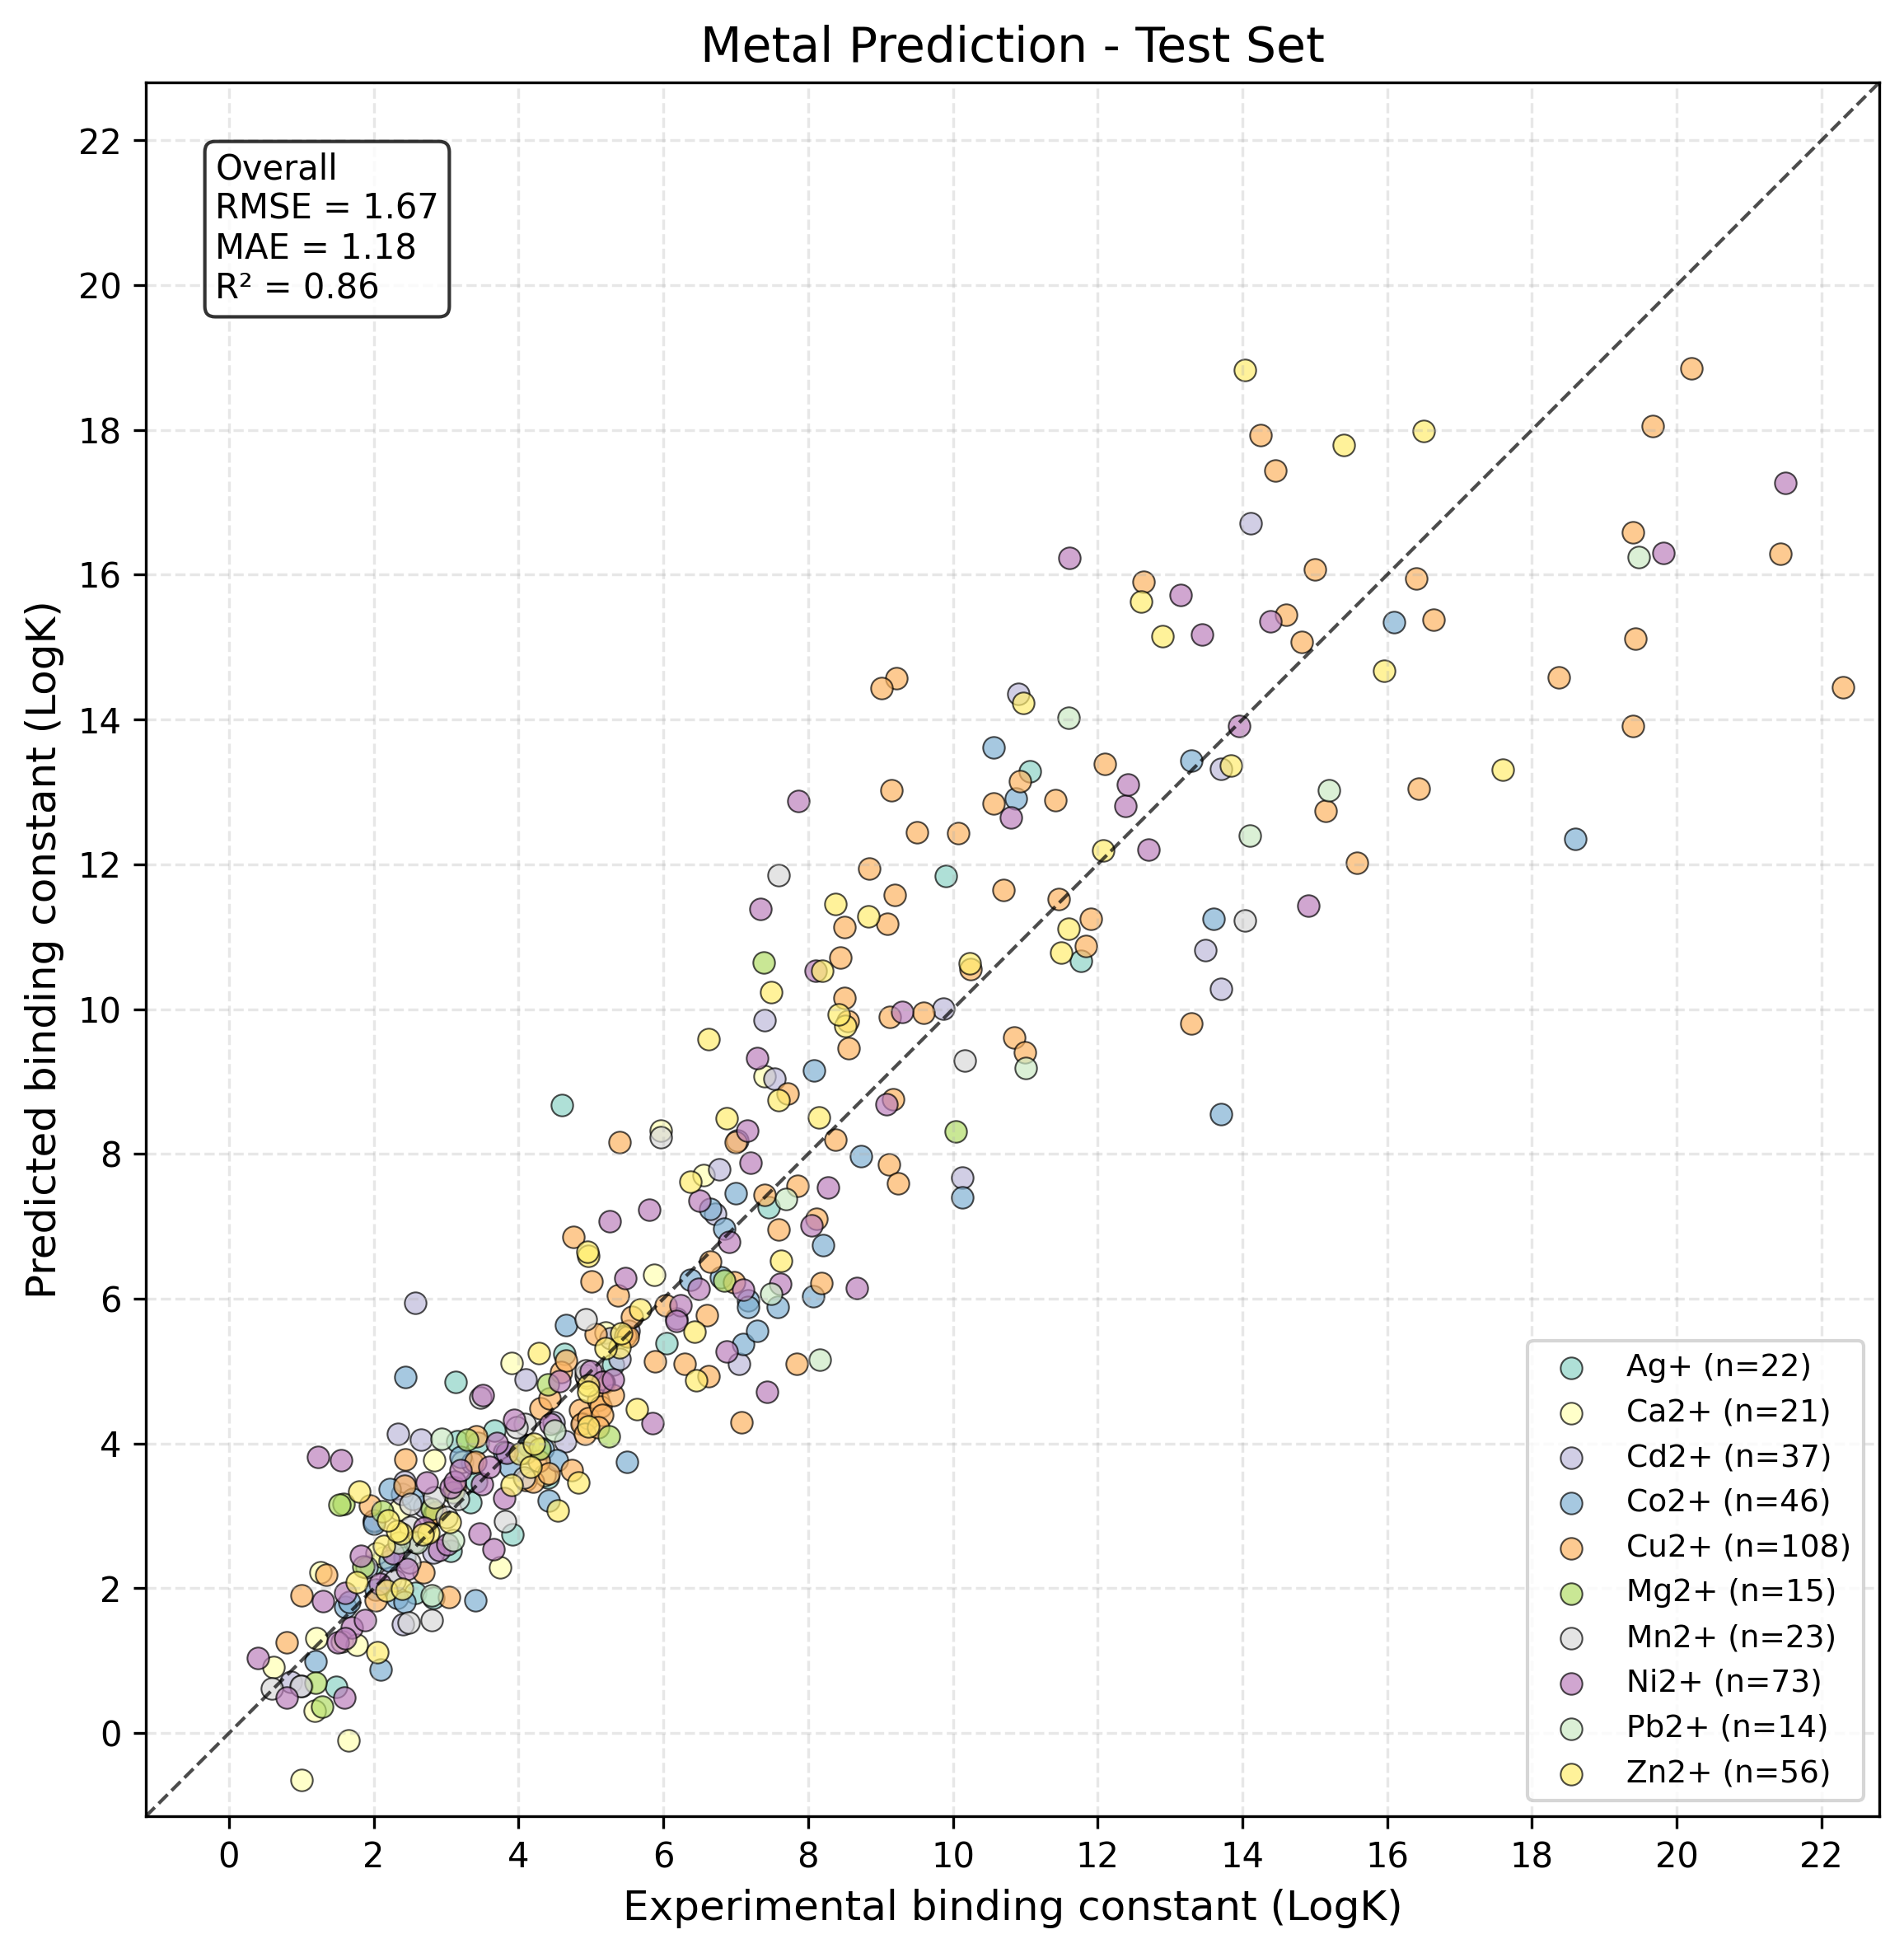

[PLOT] ../output/metal_ver14/metal_parity_test_by_metal.png saved

Test Set Metrics by Metal:
------------------------------------------------------------
   Ag+: n= 22, RMSE=1.286, MAE=0.928, R²=0.788
  Ca2+: n= 21, RMSE=1.071, MAE=0.897, R²=0.711
  Cd2+: n= 37, RMSE=1.489, MAE=1.095, R²=0.844
  Co2+: n= 46, RMSE=1.704, MAE=1.161, R²=0.825
  Cu2+: n=108, RMSE=2.045, MAE=1.463, R²=0.827
  Mg2+: n= 15, RMSE=1.255, MAE=0.988, R²=0.752
  Mn2+: n= 23, RMSE=1.294, MAE=0.805, R²=0.802
  Ni2+: n= 73, RMSE=1.582, MAE=1.069, R²=0.871
  Pb2+: n= 14, RMSE=1.706, MAE=1.370, R²=0.896
  Zn2+: n= 56, RMSE=1.614, MAE=1.180, R²=0.850
------------------------------------------------------------
Overall: n=415, RMSE=1.671, MAE=1.175, R²=0.860


In [22]:
# 創建分別的金屬parity plot函數
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def _reg_metrics(y_t: np.ndarray, y_p: np.ndarray):
    """RMSE / MAE / R²"""
    if len(y_t) == 0:
        return np.nan, np.nan, np.nan
    rmse = float(np.sqrt(mean_squared_error(y_t, y_p)))
    mae  = float(mean_absolute_error(y_t, y_p))
    r2   = float(r2_score(y_t, y_p))
    return rmse, mae, r2

def create_metal_parity_plots(df, save_dir="../output/metal_ver14"):
    """創建分別的train/test金屬parity plot"""
    import os
    os.makedirs(save_dir, exist_ok=True)
    
    # 獲取所有金屬類型
    metal_types = sorted(df['metal_ion'].unique())
    
    # 設置顏色映射
    colors = plt.cm.Set3(np.linspace(0, 1, len(metal_types)))
    metal_color_map = dict(zip(metal_types, colors))
    
    # 為train和test分別創建圖
    for data_type in ['train', 'test']:
        is_train = data_type == 'train'
        data_subset = df[df['is_train'] == is_train]
        
        if len(data_subset) == 0:
            print(f"No {data_type} data found")
            continue
            
        fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
        
        # 計算全體範圍
        all_true = data_subset['y_true'].values
        all_pred = data_subset['y_pred'].values
        mn = min(all_true.min(), all_pred.min()) - 0.5
        mx = max(all_true.max(), all_pred.max()) + 0.5
        
        # y = x 基準線
        ax.plot([mn, mx], [mn, mx], "k--", lw=1, alpha=0.7)
        
        # 為每種金屬繪製散點圖
        legend_handles = []
        metal_metrics = []
        
        for i, metal in enumerate(metal_types):
            metal_data = data_subset[data_subset['metal_ion'] == metal]
            if len(metal_data) == 0:
                continue
                
            y_true_metal = metal_data['y_true'].values
            y_pred_metal = metal_data['y_pred'].values
            
            # 計算該金屬的指標
            rmse, mae, r2 = _reg_metrics(y_true_metal, y_pred_metal)
            metal_metrics.append((metal, len(y_true_metal), rmse, mae, r2))
            
            # 繪製散點
            scatter = ax.scatter(
                y_true_metal, y_pred_metal,
                c=[metal_color_map[metal]], s=40, alpha=0.7,
                edgecolors="k", linewidth=0.5,
                label=f"{metal} (n={len(y_true_metal)})"
            )
            legend_handles.append(scatter)
        
        # 計算整體指標
        overall_rmse, overall_mae, overall_r2 = _reg_metrics(all_true, all_pred)
        
        # 設置坐標軸
        ax.set_xlim(mn, mx)
        ax.set_ylim(mn, mx)
        ax.set_aspect("equal", adjustable="box")
        ax.xaxis.set_major_locator(MultipleLocator(2))
        ax.yaxis.set_major_locator(MultipleLocator(2))
        ax.grid(ls="--", alpha=0.3)
        
        ax.set_xlabel("Experimental binding constant (LogK)", fontsize=12)
        ax.set_ylabel("Predicted binding constant (LogK)", fontsize=12)
        ax.set_title(f"Metal Prediction - {data_type.capitalize()} Set", fontsize=14)
        
        # 添加整體指標文字框
        bbox_cfg = dict(boxstyle="round", facecolor="white", alpha=0.8)
        txt_overall = f"Overall\nRMSE = {overall_rmse:.2f}\nMAE = {overall_mae:.2f}\nR² = {overall_r2:.2f}"
        ax.text(0.04, 0.96, txt_overall, transform=ax.transAxes,
                va="top", ha="left", bbox=bbox_cfg, fontsize=10)
        
        # 添加圖例
        ax.legend(handles=legend_handles, loc="lower right", fontsize=9)
        plt.tight_layout()
        plt.show()
        # 保存圖片
        save_path = f"{save_dir}/metal_parity_{data_type}_by_metal.png"
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.close(fig)
        print(f"[PLOT] {save_path} saved")
        
        # 打印各金屬指標
        print(f"\n{data_type.capitalize()} Set Metrics by Metal:")
        print("-" * 60)
        for metal, n, rmse, mae, r2 in metal_metrics:
            print(f"{metal:>6s}: n={n:3d}, RMSE={rmse:.3f}, MAE={mae:.3f}, R²={r2:.3f}")
        print("-" * 60)
        print(f"Overall: n={len(all_true):3d}, RMSE={overall_rmse:.3f}, MAE={overall_mae:.3f}, R²={overall_r2:.3f}")

# 執行繪圖
create_metal_parity_plots(df_metal)